# Airline ticket sales during festivals

## Project Description

There are files that contain query results:
/ datasets / query_1.csv - the result of the first query. It contains information about aircraft models, the number of flights for each model aircraft model in September 2018.
/ datasets / query_3.csv - the result of the third query. It contains information about the cities of flights, the average number of flights arriving in the city city per day in September 2018.

It is necessary to study the data:
Choose the top 10 cities by the number of flights;
Build schedules: aircraft models and the number of flights, cities and the number of flights, top 10 cities and the number of flights;
Draw conclusions on each of the graphs, explain the result.


Импорт библиотек 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import ttest_ind
import scipy.stats as st

In [2]:
model_flights = pd.read_csv('query_1.csv')
city_flights = pd.read_csv('query_3.csv')

In [3]:
model_flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
city_flights

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [5]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:

city_flights['average_flights']  = city_flights['average_flights'].round(2)

### Top 10 cities and the number of flights 

In [8]:
top_10_city_flights= pd.pivot_table(city_flights, index='city', values='average_flights', aggfunc='sum').sort_values('average_flights',ascending=False).reset_index().head(10)
top_10_city_flights

,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10.00
8,Сочи,9.61
9,Ульяновск,9.58


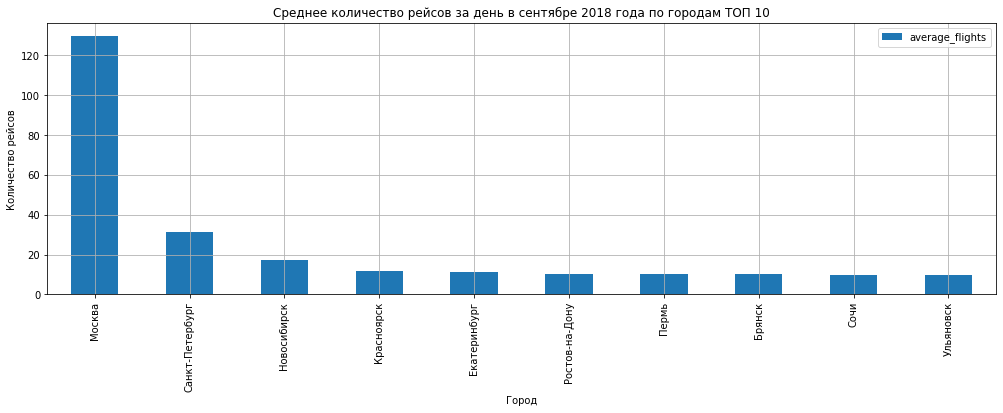

In [9]:
fig, ax = plt.subplots(figsize=(17,5))
top_10_city_flights.plot(kind='bar', x='city', grid=True, ax=ax)
plt.title('Среднее количество рейсов за день в сентябре 2018 года по городам ТОП 10')
plt.xlabel('Город')
plt.ylabel('Количество рейсов')
plt.show()

Judging by the schedule, Moscow (the capital of Russia, has several airports) is in the lead, followed by St. Petersburg, which is also a metropolis and has a large airport. Novosibirsk is one of the three leaders, as it is a kind of capital of Siberia and a connecting point or starting point. The rest of the cities have approximately the same number of flights.

### Airplane models and number of flights

In [10]:
model_flights_amount= pd.pivot_table(model_flights, index='model', values='flights_amount', aggfunc='sum').sort_values('flights_amount',ascending=False).reset_index()
model_flights_amount

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


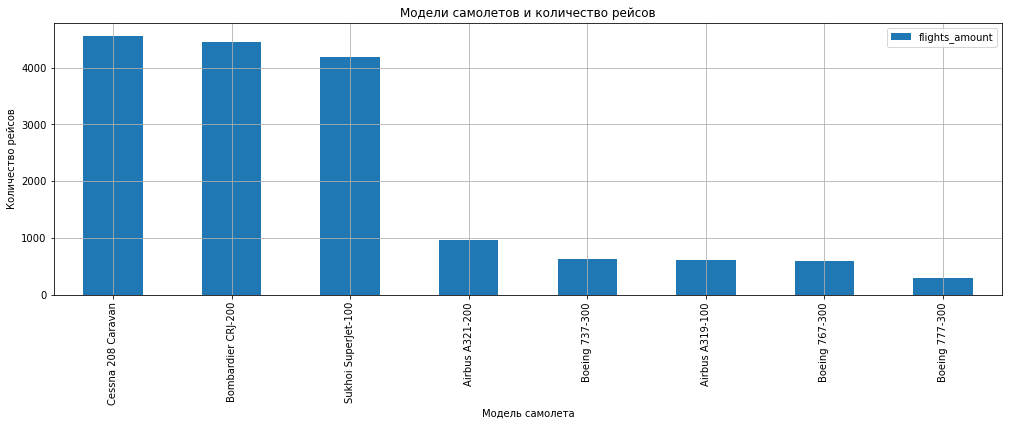

In [11]:
fig, ax = plt.subplots(figsize=(17,5))
model_flights_amount.plot(kind='bar', x='model', grid=True, ax=ax)
plt.title('Модели самолетов и количество рейсов')
plt.xlabel('Модель самолета')
plt.ylabel('Количество рейсов')
plt.show()

The largest number of flights was made on model aircraft: 
- Cessna 208 Caravan
- Bombardier CRJ-200
- Sukhoi SuperJet-100

### Cities and number of flights

In [12]:
(city_flights.sort_values(by='average_flights', ascending=False).reset_index(drop=True).style
                                     .bar(subset=['average_flights'], color='#B0E0E6', vmin=0, width=100)
                                     .set_caption('Среднее количество рейсов за день в сентябре 2018 года по всем городам')
)

,city,average_flights
0,Москва,129.770000
1,Санкт-Петербург,31.160000
2,Новосибирск,17.320000
3,Красноярск,11.580000
4,Екатеринбург,11.320000
5,Ростов-на-Дону,10.190000
6,Пермь,10.130000
7,Брянск,10.000000
8,Сочи,9.610000
9,Ульяновск,9.580000


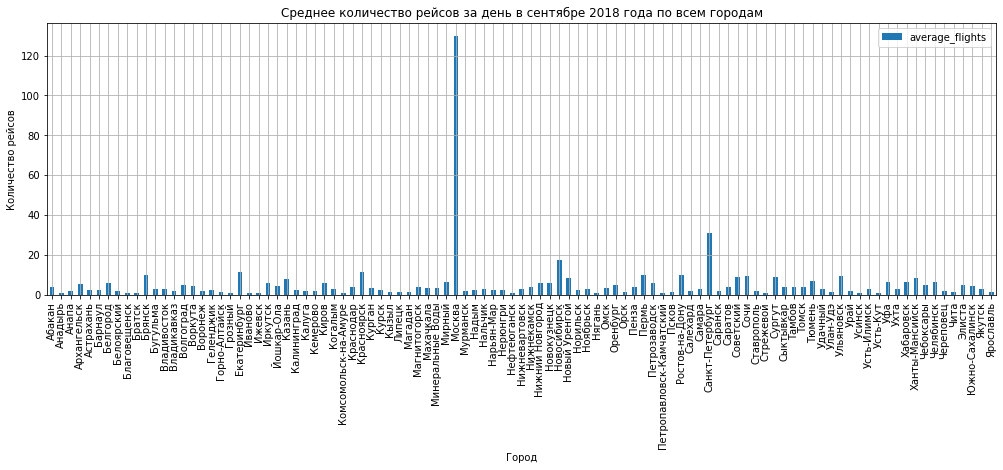

In [13]:
fig, ax = plt.subplots(figsize=(17,5))
city_flights.plot(kind='bar', x='city', grid=True, ax=ax)
plt.title('Среднее количество рейсов за день в сентябре 2018 года по всем городам')
plt.xlabel('Город')
plt.ylabel('Количество рейсов')
plt.show()

### Average ticket demand during festivals

In [14]:
festivals = pd.read_csv('query_last.csv')

In [15]:
festivals

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [16]:
festivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week_number    10 non-null     int64  
 1   ticket_amount  10 non-null     int64  
 2   festival_week  3 non-null      float64
 3   festival_name  3 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


#### Hypothesis Testing 

##### Hypothesis 1. 

- H₀ The average demand for tickets during festivals does not differ from the average demand for tickets during normal times 
- H₁ The average demand for tickets during festivals differs from the average demand for tickets during normal times

In [17]:
festival_days = festivals[festivals['festival_week'].notnull()]['ticket_amount']
not_festival_dats = festivals[festivals['festival_week'].isnull()]['ticket_amount']

In [18]:
alpha = .05

results = st.ttest_ind(
    festival_days,
    not_festival_dats,
    equal_var = False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 0.377432493172683
Failed to reject the null hypothesis



Accept Alternative H₁ Hypothesis: 
The average demand for tickets during festivals differs from the average demand for tickets during normal times.

### Conclusion

During the analisys , tables with data on airports, aircraft models, and upcoming festivals were studied.

The following conclusions can be drawn:
- to the airports of large cities such as Moscow, St. Petersburg and Novosibirsk, the largest number of flights per day was performed in September 2018;
- Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100 are leaders in the number of flights performed.

We also tested the hypothesis Demand for tickets during festivals does not differ from demand at regular times - not confirmed.
